In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

### Load MNIST Dataset

In [95]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

/Users/mac/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [96]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### Data Preprocessing

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


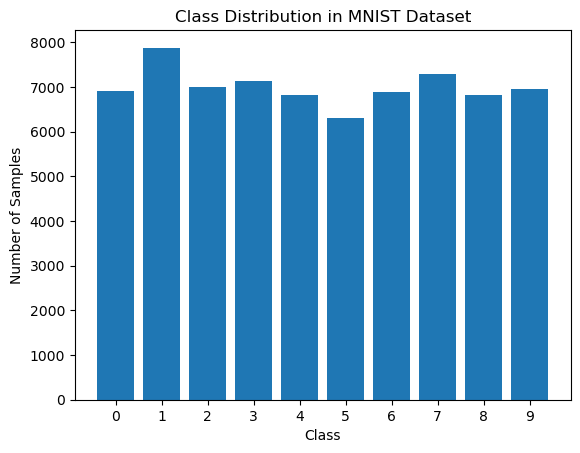

In [97]:
x, y = mnist.data, mnist.target.astype(int)
class_counts = Counter(y)
print(class_counts)
counts = [class_counts[i] for i in range(10)]
class_labels = [str(i) for i in range(10)]

plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

### Split Data

In [128]:
X = np.array(X).reshape(-1, 28, 28, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

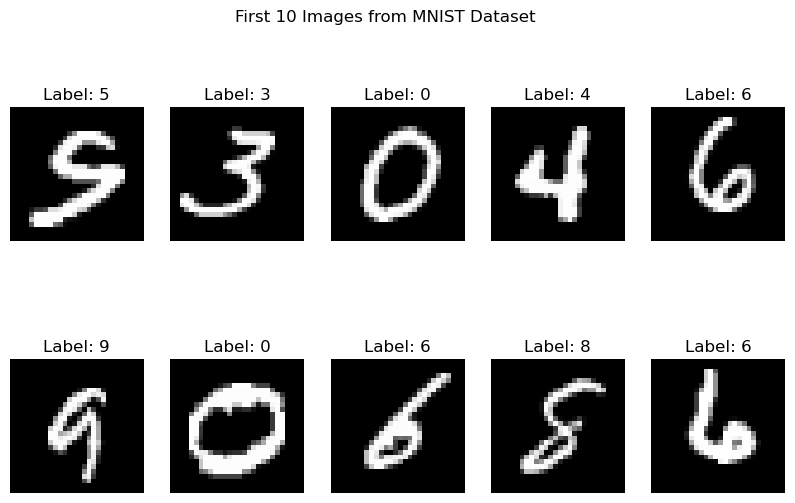

In [129]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off') 

plt.suptitle('First 10 Images from MNIST Dataset')
plt.show()

### Normalisasi

In [130]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# X_train = X_train / 255.0
# X_test = X_test / 255.0

# print first row of X_train
# print(X_train.iloc[0, :500])

In [132]:
X_train.shape

(56000, 28, 28, 1)

### ANN Modelling

### Building layer

In [191]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [174]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_107 (MaxPool  (None, 13, 13, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_112 (Conv2D)         (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_108 (MaxPool  (None, 5, 5, 32)          0         
 ing2D)                                                          
                                                                 
 conv2d_113 (Conv2D)         (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_109 (MaxPool  (None, 1, 1, 64)        

### Compiling ANN Model

In [171]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fitting

In [175]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
560/560 [==============================] - 10s 17ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0755 - val_accuracy: 0.9784
Epoch 2/10
560/560 [==============================] - 9s 17ms/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.0718 - val_accuracy: 0.9799
Epoch 3/10
560/560 [==============================] - 10s 17ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0635 - val_accuracy: 0.9824
Epoch 4/10
560/560 [==============================] - 9s 17ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0649 - val_accuracy: 0.9829
Epoch 5/10
560/560 [==============================] - 9s 17ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0617 - val_accuracy: 0.9831
Epoch 6/10
560/560 [==============================] - 10s 17ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0682 - val_accuracy: 0.9806
Epoch 7/10
560/560 [==============================] - 9s 16ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0807 - val_accuracy: 0.9

### Evaluating

In [180]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

438/438 [==============================] - 3s 7ms/step - loss: 0.0771 - accuracy: 0.9819
Loss: 0.07713296264410019
Accuracy: 0.9819285869598389


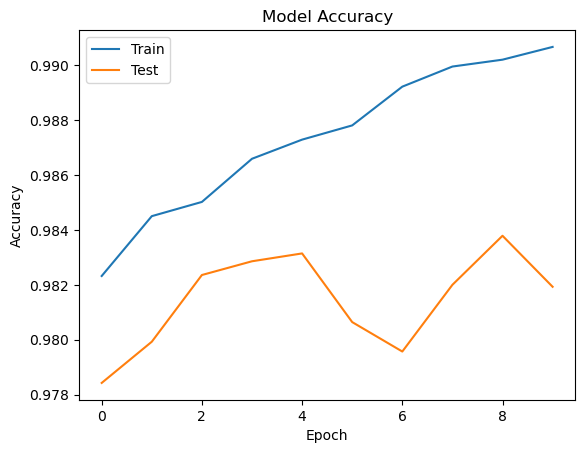

In [181]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

### Confusion Matrix

438/438 [==============================] - 2s 4ms/step


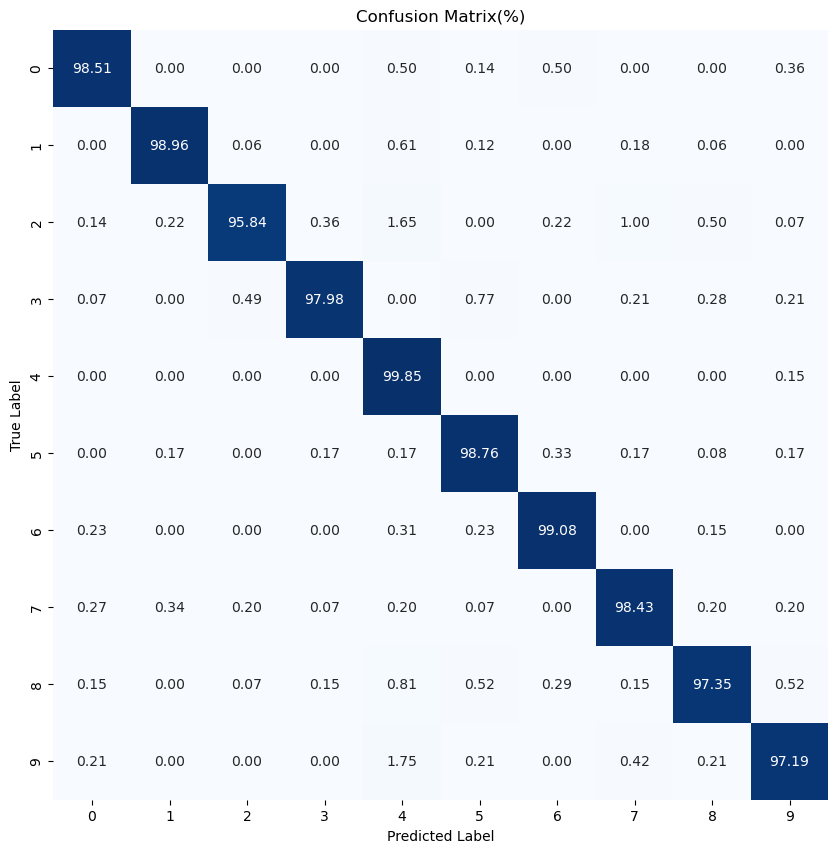

In [182]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cm_percent, annot=True, ax=ax, cmap='Blues', fmt='.2f', cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix(%)')

class_names = [str(i) for i in range(10)]
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()

438/438 [==============================] - 1s 3ms/step


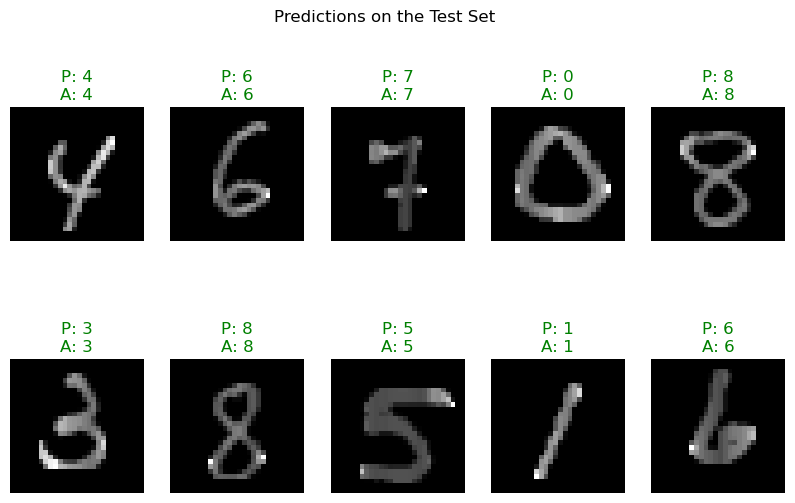

In [190]:
y_pred = model.predict(X_test)
y_actual = y_test

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    pred_val = y_pred[i].argmax()
    plt.title(f"P: {pred_val}\nA: {y_actual[i]}", color='red' if pred_val != y_actual[i] else 'green')
    plt.axis('off') 

plt.suptitle('Predictions on the Test Set')
plt.show()